In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Classic Machine Learning Techniques
Supervised Learning  -- correggi: intercation, iteration

In [2]:
seed = 42
np.random.seed(seed)

df = pd.read_csv('dataset.csv')
display(df.head())
print(f'Number of samples: {df.shape[0]}')

,rating_mean,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,1980s,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,3.893708,0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,0.2020,...,0,0,0,0,0,0,0,0,0,0
1,3.251527,0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,0.0765,...,0,0,0,0,0,0,0,0,0,0
2,3.142028,0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,0.0285,...,0,0,0,0,0,1,0,0,0,0
3,2.853547,0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,0.0320,...,0,0,0,0,0,1,0,0,0,0
4,3.058434,0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,0.0215,...,0,0,0,0,0,0,0,0,0,0


Number of samples: 13798


### Data Preprocessing

In [3]:
X = df.drop('rating_mean', axis=1)
y = df['rating_mean']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

print('Number of training samples:', X_train.shape)
print('Number of testing samples:', X_test.shape)

Number of training samples: (11038, 1147)
Number of testing samples: (2760, 1147)


# Models
### Linear Regression

In [5]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Linear Regression Results:')
print('Mean Square Error:', mse)
print('R2 Score:', r2)

Linear Regression Results:
Mean Square Error: 0.005227212704748565
R2 Score: 0.976825573190874


### Logistic Regression
Non ha molto senso per questo tipo di problema
### Ridge Regression


In [6]:
from sklearn.linear_model import Ridge

alphas = [0.001, 0.01, 0.1, 1, 5, 10, 20]

best_mse = None
best_r2 = None
best_alpha = None
results = []

i = 0
for alpha in alphas:
    i += 1
    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X_train, y_train)
    y_pred = ridge_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    if best_mse is None or mse < best_mse:
        best_mse = mse
        best_r2 = r2
        best_alpha = alpha

    results.append((i, alpha, mse, r2))

    print('Iteration: {} - Alpha: {} - MSE: {} - R2: {}\n'.format(i, alpha, mse, r2))

print('Ridge Regression Best Results:')
print('Alpha:', best_alpha)
print('Mean Square Error:', best_mse)
print('R2 Score:', best_r2)


Interaction: 1 - Alpha: 0.001 - MSE: 0.005227112435072849 - R2: 0.976826017728411

Interaction: 2 - Alpha: 0.01 - MSE: 0.005226215036545749 - R2: 0.9768299962725528

Interaction: 3 - Alpha: 0.1 - MSE: 0.005217704544125444 - R2: 0.976867726855723

Interaction: 4 - Alpha: 1 - MSE: 0.005162006315147821 - R2: 0.9771146604709683

Interaction: 5 - Alpha: 5 - MSE: 0.005125526729723692 - R2: 0.9772763897768507

Interaction: 6 - Alpha: 10 - MSE: 0.005196090902363647 - R2: 0.9769635491968786

Interaction: 7 - Alpha: 20 - MSE: 0.005409961044008941 - R2: 0.9760153731374437

Ridge Regression Best Results:
Alpha: 5
Mean Square Error: 0.005125526729723692
R2 Score: 0.9772763897768507


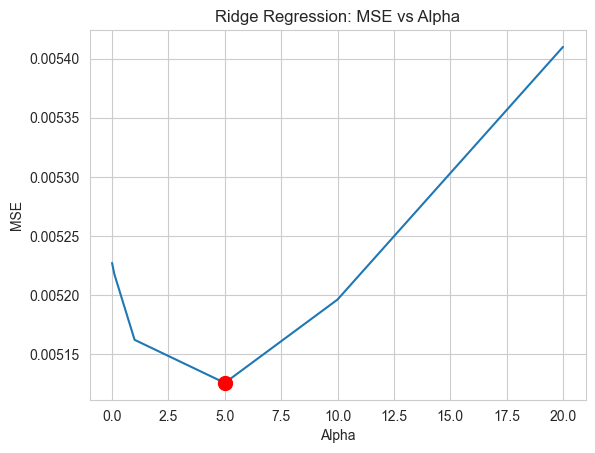

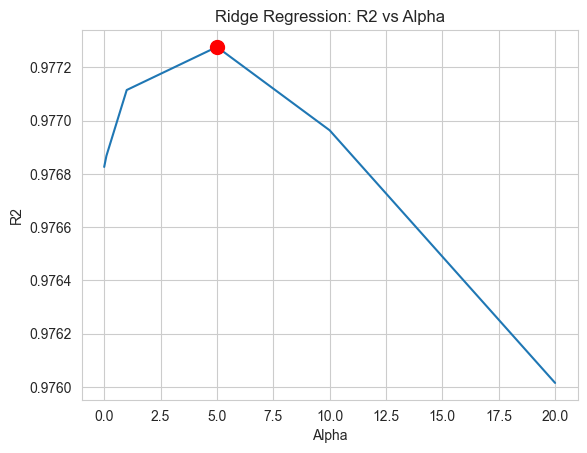

In [7]:
results = pd.DataFrame(results, columns=['Iteration', 'Alpha', 'MSE', 'R2'])

sns.lineplot(x='Alpha', y='MSE', data=results)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Ridge Regression: MSE vs Alpha')
plt.scatter(best_alpha, best_mse, color='red', marker='o', s=100, zorder=3)
plt.show()

sns.lineplot(x='Alpha', y='R2', data=results)
plt.xlabel('Alpha')
plt.ylabel('R2')
plt.title('Ridge Regression: R2 vs Alpha')
plt.scatter(best_alpha, best_r2, color='red', marker='o', s=100, zorder=3)
plt.show()

### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

alphas = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

best_mse = None
best_r2 = None
best_alpha = None

results = []

i = 0
for alpha in alphas:
    i += 1
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)
    y_pred = lasso_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    if best_mse is None or mse < best_mse:
        best_mse = mse
        best_r2 = r2
        best_alpha = alpha

    results.append((i, alpha, mse, r2))

    print('Iteration: {} - Alpha: {} - MSE: {} - R2: {}\n'.format(i, alpha, mse, r2))

print('Lasso Regression Best Results:')
print('Alpha:', best_alpha)
print('Mean Square Error:', best_mse)
print('R2 Score:', best_r2)


Interaction: 1 - Alpha: 0.01 - MSE: 0.03089607185975027 - R2: 0.8630247521106529

Interaction: 2 - Alpha: 0.001 - MSE: 0.009819687205531386 - R2: 0.956465207121499



D:\Workspace\data-analytics-movielens\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.805e+00, tolerance: 2.608e-01
  model = cd_fast.enet_coordinate_descent(


Interaction: 3 - Alpha: 0.0001 - MSE: 0.005411520205658336 - R2: 0.9760084607197618



D:\Workspace\data-analytics-movielens\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.259e+01, tolerance: 2.608e-01
  model = cd_fast.enet_coordinate_descent(


Interaction: 4 - Alpha: 1e-05 - MSE: 0.005189538688613613 - R2: 0.9769925979091779



In [ ]:
results = pd.DataFrame(results, columns=['Iteration', 'Alpha', 'MSE', 'R2'])

sns.lineplot(x='Alpha', y='MSE', data=results)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Lasso Regression: MSE vs Alpha')
plt.scatter(best_alpha, best_mse, color='red', marker='o', s=100, zorder=3)
plt.show()

sns.lineplot(x='Alpha', y='R2', data=results)
plt.xlabel('Alpha')
plt.ylabel('R2')
plt.title('Lasso Regression: R2 vs Alpha')
plt.scatter(best_alpha, best_r2, color='red', marker='o', s=100, zorder=3)
plt.show()

### Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet

alphas = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

best_mse = None
best_r2 = None
best_alpha = None

results = []

i = 0
for alpha in alphas:
    i += 1
    elastic_net_regressor = ElasticNet(alpha=alpha)
    elastic_net_regressor.fit(X_train, y_train)
    y_pred = elastic_net_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    if best_mse is None or mse < best_mse:
        best_mse = mse
        best_r2 = r2
        best_alpha = alpha

    results.append((i, alpha, mse, r2))

    print('Iteration: {} - Alpha: {} - MSE: {} - R2: {}\n'.format(i, alpha, mse, r2))

print('Elastic Net Regression Best Results:')
print('Alpha:', best_alpha)
print('Mean Square Error:', best_mse)
print('R2 Score:', best_r2)

Interaction: 1 - Alpha: 0.01 - MSE: 0.020808699901370298 - R2: 0.9077463037960364

Interaction: 2 - Alpha: 0.001 - MSE: 0.007811683477993957 - R2: 0.9653675300313731



D:\Workspace\data-analytics-movielens\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.210e+01, tolerance: 2.608e-01
  model = cd_fast.enet_coordinate_descent(


Interaction: 3 - Alpha: 0.0001 - MSE: 0.00514538096120985 - R2: 0.9771883676395442



In [ ]:
results = pd.DataFrame(results, columns=['Iteration', 'Alpha', 'MSE', 'R2'])

sns.lineplot(x='Alpha', y='MSE', data=results)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Elastic Net Regression: MSE vs Alpha')
plt.scatter(best_alpha, best_mse, color='red', marker='o', s=100, zorder=3)
plt.show()

sns.lineplot(x='Alpha', y='R2', data=results)
plt.xlabel('Alpha')
plt.ylabel('R2')
plt.title('Elastic Net Regression: R2 vs Alpha')
plt.scatter(best_alpha, best_r2, color='red', marker='o', s=100, zorder=3)
plt.show()

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=seed)
rf_regressor.fit(X_train, np.ravel(y_train))

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Square Error:', mse)
print('R2 Score:', r2)

print('Accuracy:', rf_regressor.score(X_test, y_test))
rankVar = pd.Series(rf_regressor.feature_importances_, index=X.columns).sort_values(ascending=False)
print(rankVar)

sns.barplot(x=rankVar[:10], y=rankVar.index[:10])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Features")
plt.show()

### Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=seed)
gb_regressor.fit(X_train, np.ravel(y_train))

y_pred = gb_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Square Error:', mse)
print('R2 Score:', r2)

print('Accuracy:', gb_regressor.score(X_test, y_test))

rankVar = pd.Series(gb_regressor.feature_importances_, index=X.columns).sort_values(ascending=False)

sns.barplot(x=rankVar[:10], y=rankVar.index[:10])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Features")
plt.show()

### Support Vector Regressor

In [4]:
from sklearn.svm import SVR

c = [0.001, 0.01, 0.1, 1, 5]
epsilon = [0.001, 0.01, 0.1, 1, 5]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

best_mse = None
best_r2 = None
best_c = None
best_epsilon = None
best_kernel = None

results = []

i = 0

for c in c:
    for epsilon in epsilon:
        for kernel in kernel:
            i += 1
            svr_regressor = SVR(C=c, epsilon=epsilon, kernel=kernel)
            svr_regressor.fit(X_train, np.ravel(y_train))
            y_pred = svr_regressor.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            if best_mse is None or mse < best_mse:
                best_mse = mse
                best_r2 = r2
                best_c = c
                best_epsilon = epsilon
                best_kernel = kernel

            results.append((i, c, epsilon, kernel, mse, r2))

            print('Iteration: {} - C: {} - Epsilon: {} - Kernel: {} - MSE: {} - R2: {}\n'.format(i, c, epsilon, kernel, mse, r2))

print('Support Vector Regression Best Results:')
print('C:', best_c)
print('Epsilon:', best_epsilon)
print('Kernel:', best_kernel)
print('Mean Square Error:', best_mse)
print('R2 Score:', best_r2)


Interaction: 1 - C: 0.001 - Epsilon: 0.001 - Kernel: linear - MSE: 0.00781528718756544 - R2: 0.9653515532750361

Interaction: 2 - C: 0.001 - Epsilon: 0.001 - Kernel: poly - MSE: 0.07344464084408064 - R2: 0.6743890960822185

Interaction: 3 - C: 0.001 - Epsilon: 0.001 - Kernel: rbf - MSE: 0.0985468736736527 - R2: 0.5631003672103104

Interaction: 4 - C: 0.001 - Epsilon: 0.001 - Kernel: sigmoid - MSE: 0.1367003482992314 - R2: 0.39395000827789173



InvalidParameterError: The 'kernel' parameter of SVR must be a str among {'sigmoid', 'linear', 'precomputed', 'poly', 'rbf'} or a callable. Got 's' instead.

### Naive Bayes Classifier (GaussianNB)
Non ottimo prende solo valori interi
https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python

Mean Square Error: 0.5966572479951741
R2 Score: -1.6452318864387583
Model accuracy score: 0.6199
Checking for overfitting:
Training set score: 0.6323
Test set score: 0.6199
False Positives: [164 402 102 381]
False Negatives: [  6 243 788  12]
True Positives: [  32  427 1189   63]
True Negatives: [2558 1688  681 2304]


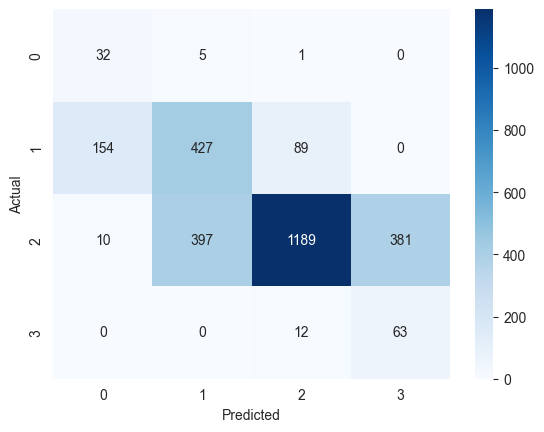

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train.astype('int'))

y_pred = nb_classifier.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Square Error:', mse)
print('R2 Score:', r2)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test.astype('int'), y_pred)))

# Check for overfitting
print('Checking for overfitting:')
print('Training set score: {:.4f}'.format(nb_classifier.score(X_train, y_train.astype('int'))))
print('Test set score: {:.4f}'.format(nb_classifier.score(X_test, y_test.astype('int'))))

# Confusion matrix
cm = confusion_matrix(y_test.astype('int'), y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

print('False Positives:', FP)
print('False Negatives:', FN)
print('True Positives:', TP)
print('True Negatives:', TN)

### K-Nearest Neighbors
è un classificatore non un regressore